# Graduate Admission Prediction Using Keras Regression Deep Learning ANN

Graduate Admission Prediction is a task in data science and machine learning that involves predicting the likelihood of a student being admitted to a graduate program based on various factors such as their academic performance, standardized test scores, letters of recommendation, statement of purpose, and other relevant attributes.

                           SUBNITTED BY

                    PINTU KUMAR SAH SID- 100223 

                     UNDER SUPERVISION OF 
                     MR.VIVEK PANDEY SIR

# Now import the required libraries ,read the csv file than after show the top 5 rows and column

In [1]:
#import the required library 
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.express as px

In [2]:
df = pd.read_csv("D:\\All Subject(6)\\Samatrix\\archive (8)\\Admission_Predict.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#it shows the total number of rows and no. of columns of the dataframe
df.shape

(400, 9)

In [5]:
df.sample(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
167,168,313,102,3,2.0,3.0,8.27,0,0.64
77,78,301,99,2,3.0,2.0,8.22,0,0.64
37,38,300,105,1,1.0,2.0,7.80,0,0.58


In [45]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [46]:
# To show the index, columns, data-types of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [6]:
#to check for missing values in each column.
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
# Remove the 'Serial No.'
df.drop(columns=['Serial No.'],axis=1,inplace=True)

In [8]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
# converts the selected data into a NumPy array.
X=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values

In [10]:
X

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 116.  ,   4.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       [333.  , 117.  ,   4.  , ...,   4.  ,   9.66,   1.  ]])

In [11]:
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [12]:
from sklearn.preprocessing import StandardScaler      # Import the StandardScaler
scaler = StandardScaler()

In [13]:
X = scaler.fit_transform(X)               # X using the StandardScaler object scaler.

In [14]:
X

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

# used to split the data into training and testing sets for both features (X) and target (y).

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [16]:
X_train.shape

(320, 7)

In [17]:
X_test.shape

(80, 7)

In [18]:
X_train[10]

array([0.71492181, 0.5922214 , 0.79882862, 0.59665321, 1.16732114,
       0.85812573, 0.90911166])

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model = Sequential()

In [21]:
X_train.shape

(320, 7)

# using the ReLU activation function.

In [22]:
model.add(Dense(7,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(1,activation='linear'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [25]:
model = Sequential()
model.add(Dense(32, input_shape=(7,))) 

In [26]:
model.compile(optimizer='adam', loss='mse')


# used to train a neural network model using the specified training data and training configuration.

In [27]:
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 903us/step - loss: 1.0072
Epoch 2/100
32/32 [==============================] - 0s 924us/step - loss: 0.8257
Epoch 3/100
32/32 [==============================] - 0s 910us/step - loss: 0.6900
Epoch 4/100
32/32 [==============================] - 0s 887us/step - loss: 0.5839
Epoch 5/100
32/32 [==============================] - 0s 811us/step - loss: 0.5026
Epoch 6/100
32/32 [==============================] - 0s 950us/step - loss: 0.4390
Epoch 7/100
32/32 [==============================] - 0s 935us/step - loss: 0.3855
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3413
Epoch 9/100
32/32 [==============================] - 0s 1000us/step - loss: 0.3031
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2703
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2412
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2154
Epoch 13/100
32/32 [

In [28]:
y_pred= model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


In [49]:
yp = model.predict(X_test)
yp[:5]

array([0.808706  , 0.84565983, 0.50642444, 0.69133529, 0.45036351])

In [50]:
# To store the binary predictions.
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [51]:
y_pred[:10]

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1]

In [53]:
y_test[:10]

array([0.84, 0.87, 0.45, 0.76, 0.57, 0.81, 0.78, 0.69, 0.61, 0.69])

In [56]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming y_test and y_pred are your actual and predicted values, respectively
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')


R-squared: -4.776017714188383
Mean Squared Error: 0.08477749999999999


In [31]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming x and y are your feature and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)


R^2 Score: 0.7728292626038836


Text(69.0, 0.5, 'Truth')

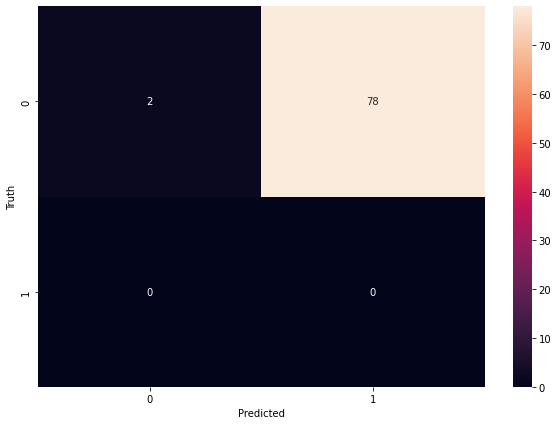

In [59]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [60]:
y_test.shape

(80,)

# Accuracy

In [61]:
round((862+229)/(862+229+137+179),2)

0.78

Recall for 0 class

In [62]:
round(862/(862+137),2)

0.86

# Streamlit

In [70]:
!pip install streamlit

  Using cached protobuf-4.25.3-cp39-cp39-win_amd64.whl (413 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\pintu kumar sah\\anaconda3\\Lib\\site-packages\\google\\protobuf\\~-ternal\\_api_implementation.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [71]:
%%writefile app.py
import numpy as np
import tensorflow as tf
import pandas as pd
import streamlit as st
from sklearn.metrics import accuracy_score
from joblib import dump,load
df=pd.read_csv("D:\\All Subject(6)\\Samatrix\\archive (8)\\Admission_Predict.csv")

df.drop(columns=['Serial No.'],axis=1,inplace=True)
df=df.dropna()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model.add(Dense(7,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(1,activation='linear'))
model.summary()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
from tensorflow import keras
from tensorflow import keras 
from keras.layers import Dense
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)
y_pred=model.predict(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

print(LinearRegression_report(y_test,y_pred))

st.title("Graduate Admission Prediction Visualiztion")
st.write("Enter the following features to check if the transaction is Graduate Admission Prediction Visualiztion:")
input_df=st.text_input('Input All features')
input_df_lst=input_df.split(',')
submit=st.button("Submit")

if submit:
    features=np.array(input_df_lst,dtype=np.float64)
    prediction=model.predict(features.reshape(1,-1))
    if prediction[0]==0:
        st.write(" Graduate Admission Prediction")
    else:
        st.write("Graduate Admission Prediction Visualiztion")

Overwriting app.py


In [72]:
!wget -q -O - ipv4.icanhazip.com

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501